In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train = pd.read_csv('dataset/train.csv')
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [72]:
test = pd.read_csv('dataset/test.csv')
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [73]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [74]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [75]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot: xlabel='target'>

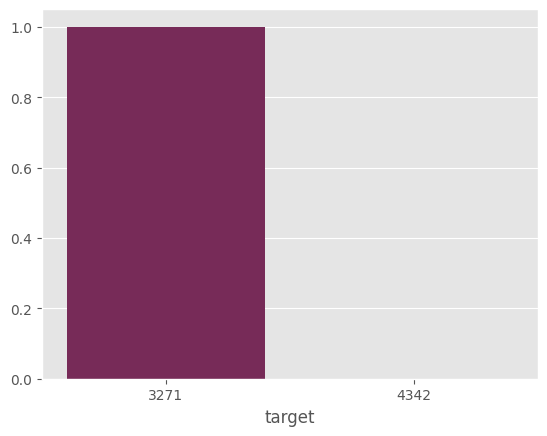

In [81]:
sns.barplot(y=train['target'].value_counts().index,x=train['target'].value_counts(),palette='rocket')

In [18]:
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [19]:
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

In [20]:
train['keyword'].value_counts()[:20]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

<AxesSubplot: xlabel='keyword'>

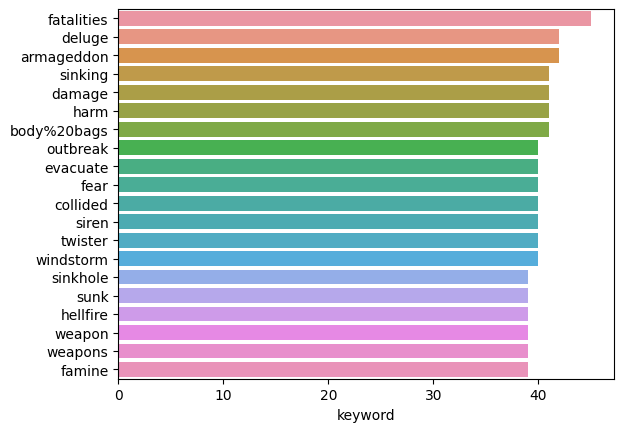

In [21]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

In [22]:
train.loc[train['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

In [23]:
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

<AxesSubplot: xlabel='location'>

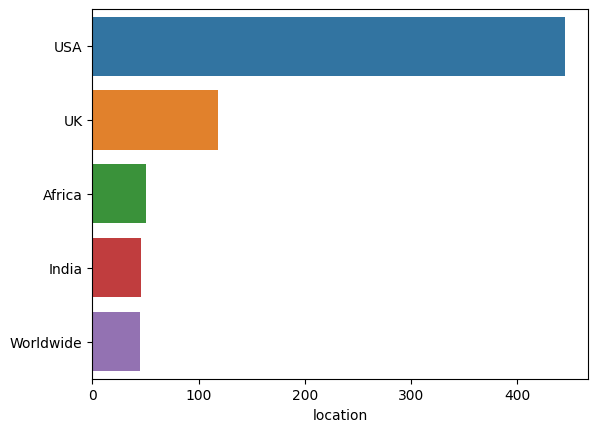

In [24]:
sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

In [25]:
import os
import re
import time
import string

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

In [32]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, Bidirectional
from keras.layers import Embedding, BatchNormalization, Dense, TimeDistributed, Dropout, Flatten, GlobalMaxPool1D

In [34]:
train = pd.read_csv('dataset/train.csv')
test  = pd.read_csv('dataset/test.csv')
submission = pd.read_csv('dataset/sample_submission.csv')

In [35]:
train_sent, test_sent, train_label = train.text.values, test.text.values, train.target.values

In [36]:
train.text.values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [37]:
from sklearn.metrics import classification_report
leak = pd.read_csv("dataset/socialmedia-disaster-tweets-DFE.csv", encoding='latin_1')
leak['target'] = (leak['choose_one']=='Relevant').astype(int)
leak['id'] = leak.index
leak = leak[['id', 'target','text']]
merged_df = pd.merge(test, leak, on='id')
gt_df = merged_df[['id', 'target']]
#gt_df.to_csv('submit.csv', index=False)

In [38]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_sent)
vocab_length = len(word_tokenizer.word_index) + 1

In [39]:
def embed(corpus): return word_tokenizer.texts_to_sequences(corpus)

In [40]:
def metrics(y_true, y_pred):
    print("F1-score: ", round(f1_score(y_true, y_pred), 2))
    print("Precision: ", round(precision_score(y_true, y_pred), 2))
    print("Recall: ", round(recall_score(y_true, y_pred), 2))
    
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [41]:
longest_train = max(train_sent, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train)) # max_len = 31

In [42]:
padded_sentences = pad_sequences(embed(train_sent), length_long_sentence, padding='post')
test_sentences   = pad_sequences(embed(test_sent), length_long_sentence, padding='post')

In [43]:
%%time
# Import word vectors from GloVe
embeddings_dictionary = dict()
embedding_dim = 100

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
glove_file = open('dataset/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [45]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

In [46]:
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector # embedding_matrix.shape = (16834, 100)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(padded_sentences, 
                                                    train_label, 
                                                    test_size=0.25,
                                                    random_state=42, 
                                                    shuffle=True)
# X_train.shape, X_test.shape = ((5709, 31), (1904, 31))

In [55]:
def training(model, model_name):
    # Config
    checkpoint = ModelCheckpoint("models/"+model_name + '.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
    reduce_lr  = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, verbose = 1, patience = 5, min_lr = 0.001)
    early_stop = EarlyStopping(monitor='val_loss', patience=1)
    
    # Train
    start_time = time.time()
    history = model.fit(X_train, y_train, 
                        epochs = 100,
                        batch_size = 32,
                        validation_data = [X_test, y_test],
                        verbose = 1,
                        callbacks = [reduce_lr, checkpoint, early_stop])
    end_time = time.time()
    print("\n=>Training time :", round(end_time - start_time, 1), 's')

    # Validation
    model.load_weights("models/"+model_name + '.h5')
    start_time = time.time()
    preds =  (model.predict(X_test) > 0.5).astype("int32")
    end_time = time.time()
    print('\n=>Average Inference Time :', round((end_time - start_time) / len(X_test) * 1000, 1), 'ms')
    print('\n=>Model Size :', round(os.stat("models/"+model_name + '.h5').st_size / (1024 ** 2), 1), 'MB')
    
    # Evaluation
    print('='*5, 'train_test_split Evaluation:', '='*5)
    metrics(y_test, preds)
    plot(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])
    
    # Ground Truth evaluation
    print('='*5, 'Ground Truth Evaluation:', '='*5)
    test_preds = (model.predict(test_sentences) > 0.5).astype("int32")
    metrics(gt_df['target'], test_preds)
    #print('sklearn f1_score average=micro:', f1_score(gt_df['target'], test_preds, average='micro'))
    #print('classification_report accuracy:', classification_report(gt_df['target'], test_preds, output_dict=True)['accuracy'])
    #print(classification_report(gt_df['target'], test_preds))

In [50]:
def CNN():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
model = CNN()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 32)            25632     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                      

Epoch 1/100
178/179 [============================>.] - ETA: 0s - loss: 0.1591 - accuracy: 0.9426
Epoch 1: val_loss improved from inf to 0.50875, saving model to models\model_cnn.h5
179/179 [==============================] - 11s 63ms/step - loss: 0.1589 - accuracy: 0.9427 - val_loss: 0.5088 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 2/100
178/179 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.9733
Epoch 2: val_loss did not improve from 0.50875
179/179 [==============================] - 10s 57ms/step - loss: 0.0892 - accuracy: 0.9734 - val_loss: 0.5758 - val_accuracy: 0.8004 - lr: 0.0010

=>Training time : 21.6 s
60/60 [==============================] - 1s 6ms/step

=>Average Inference Time : 10.9 ms

=>Model Size : 26.4 MB
===== train_test_split Evaluation: =====
F1-score:  0.76
Precision:  0.76
Recall:  0.77
===== Ground Truth Evaluation: =====
102/102 [==============================] - 1s 6ms/step
F1-score:  0.75
Precision:  0.77
Recall:  0.72


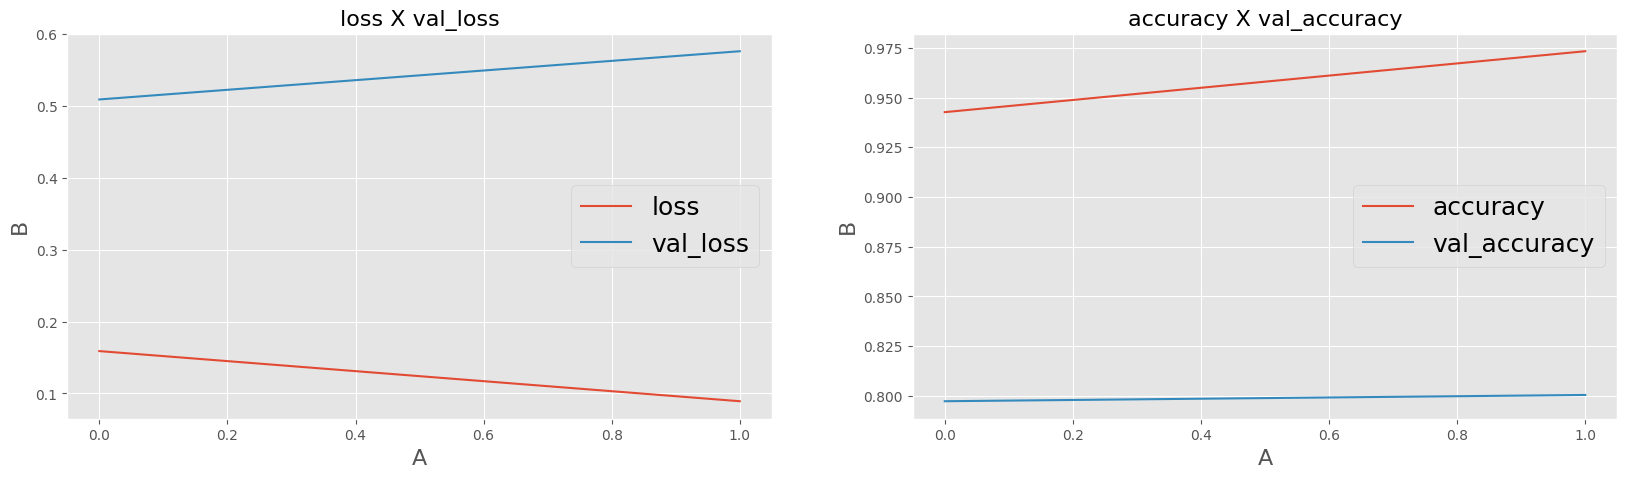

In [56]:
training(model, 'model_cnn')

In [57]:
def RNN():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(SimpleRNN(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [58]:
model = RNN()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional (Bidirectiona  (None, 72, 144)          24912     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 144)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 144)              576       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 144)               0         
                                                      

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.6278
Epoch 1: val_loss improved from inf to 0.58807, saving model to models\model_rnn.h5
179/179 [==============================] - 119s 668ms/step - loss: 0.6578 - accuracy: 0.6278 - val_loss: 0.5881 - val_accuracy: 0.7232 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.7175
Epoch 2: val_loss improved from 0.58807 to 0.46001, saving model to models\model_rnn.h5
179/179 [==============================] - 26s 147ms/step - loss: 0.5716 - accuracy: 0.7175 - val_loss: 0.4600 - val_accuracy: 0.8078 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7520
Epoch 3: val_loss improved from 0.46001 to 0.43119, saving model to models\model_rnn.h5
179/179 [==============================] - 24s 133ms/step - loss: 0.5245 - accuracy: 0.7520 - val_loss: 0.4312 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 4

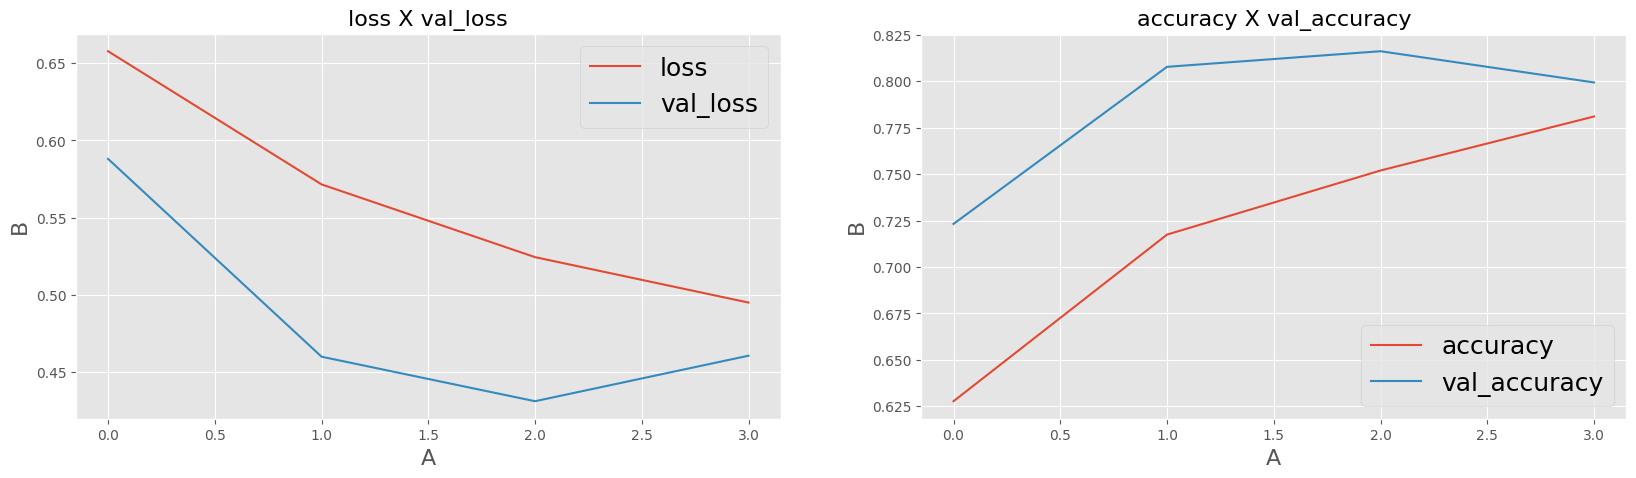

In [61]:
training(model, 'model_rnn')

In [62]:
def BiGRU():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(GRU(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [63]:
model = BiGRU()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional_1 (Bidirectio  (None, 72, 144)          75168     
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 144)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_1 (Batc  (None, 144)              576       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 144)               0         
                                                      

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.6269
Epoch 1: val_loss improved from inf to 0.57889, saving model to models\model_bigru.h5
179/179 [==============================] - 59s 240ms/step - loss: 0.7150 - accuracy: 0.6269 - val_loss: 0.5789 - val_accuracy: 0.7978 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.7460
Epoch 2: val_loss improved from 0.57889 to 0.46473, saving model to models\model_bigru.h5
179/179 [==============================] - 41s 227ms/step - loss: 0.5307 - accuracy: 0.7460 - val_loss: 0.4647 - val_accuracy: 0.8083 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.4638 - accuracy: 0.7973
Epoch 3: val_loss improved from 0.46473 to 0.41188, saving model to models\model_bigru.h5
179/179 [==============================] - 42s 234ms/step - loss: 0.4638 - accuracy: 0.7973 - val_loss: 0.4119 - val_accuracy: 0.8283 - lr: 0.0010
Ep

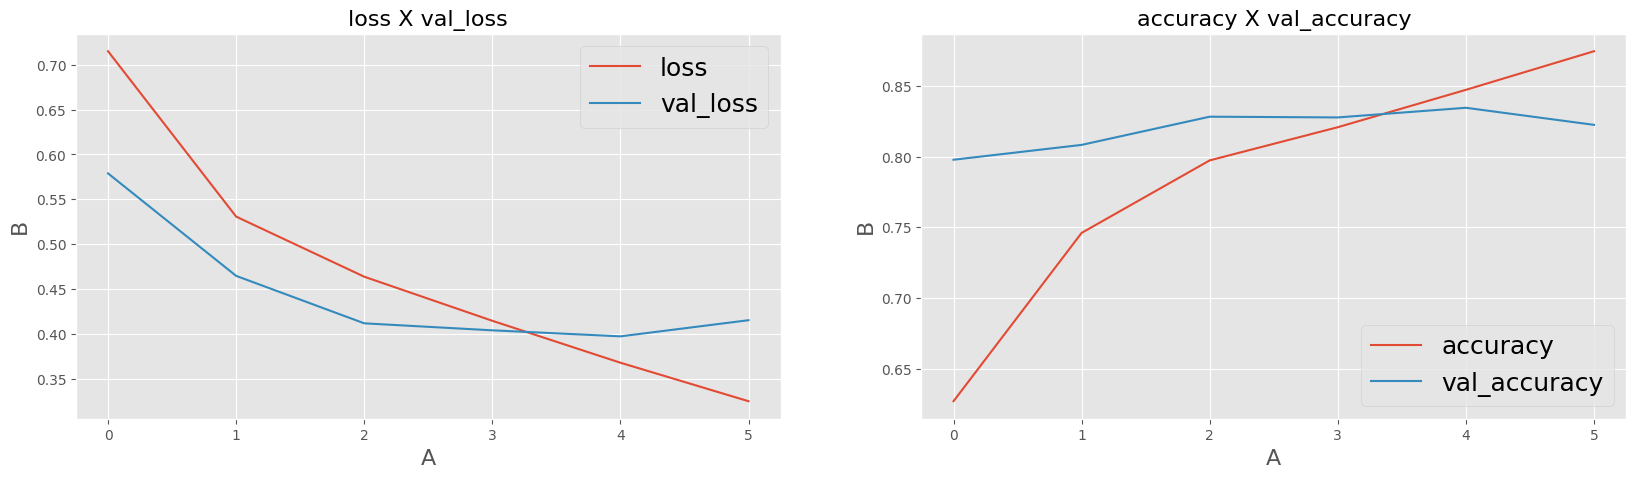

In [64]:
training(model, 'model_bigru')

In [65]:
def BiLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:
model = BiLSTM()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional_2 (Bidirectio  (None, 72, 144)          99648     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 144)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_2 (Batc  (None, 144)              576       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 144)               0         
                                                      

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.6614
Epoch 1: val_loss improved from inf to 0.59392, saving model to models\model_bilstm.h5
179/179 [==============================] - 72s 347ms/step - loss: 0.6843 - accuracy: 0.6614 - val_loss: 0.5939 - val_accuracy: 0.8020 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.7667
Epoch 2: val_loss improved from 0.59392 to 0.50345, saving model to models\model_bilstm.h5
179/179 [==============================] - 57s 317ms/step - loss: 0.5203 - accuracy: 0.7667 - val_loss: 0.5035 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.8043
Epoch 3: val_loss improved from 0.50345 to 0.41656, saving model to models\model_bilstm.h5
179/179 [==============================] - 51s 284ms/step - loss: 0.4501 - accuracy: 0.8043 - val_loss: 0.4166 - val_accuracy: 0.8267 - lr: 0.0010

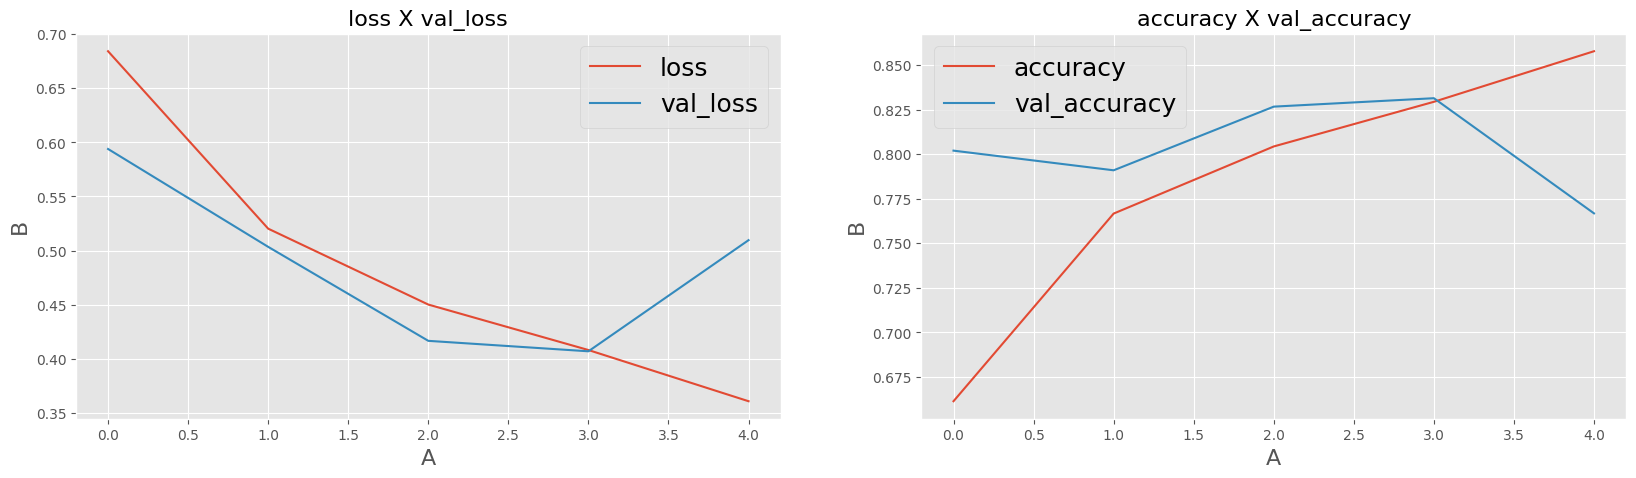

In [67]:
training(model, 'model_bilstm')

In [68]:
submission.target = (model.predict(test_sentences) > 0.5).astype("int32")
submission.to_csv("dataset/submission.csv", index=False)

102/102 [==============================] - 4s 40ms/step


In [69]:
test_preds = (model.predict(test_sentences) > 0.5).astype("int32")
print('sklearn f1_score average=micro:', f1_score(gt_df['target'], test_preds, average='micro'))
print('classification_report accuracy:', classification_report(gt_df['target'], test_preds, output_dict=True)['accuracy'])
print(classification_report(gt_df['target'], test_preds))

102/102 [==============================] - 4s 38ms/step
sklearn f1_score average=micro: 0.8087649402390438
classification_report accuracy: 0.8087649402390438
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1861
           1       0.81      0.73      0.77      1402

    accuracy                           0.81      3263
   macro avg       0.81      0.80      0.80      3263
weighted avg       0.81      0.81      0.81      3263

